In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import bokeh.io
import bokeh.models
import bokeh.palettes
import bokeh.plotting

# Display graphics in this notebook
bokeh.io.output_notebook()

import pandas.io.sql as pd_sql
import sqlite3 as sql

Loading BokehJS ...

In [2]:
ls

data/  ejemplo-mundial-18.ipynb*  enunciado-evaluacion.txt  Untitled.ipynb


In [3]:
data = pd.read_csv("data/data-mundial-2018.csv", low_memory=False, encoding='utf-8', sep="|")


In [4]:
print data.keys()

Index([u'Numero', u'FIFADisplayName', u'Country', u'LastName', u'FirstName',
       u'ShirtName', u'DOB', u'POS', u'Club', u'Height', u'Caps', u'Goals'],
      dtype='object')


In [5]:
data.shape

(736, 12)

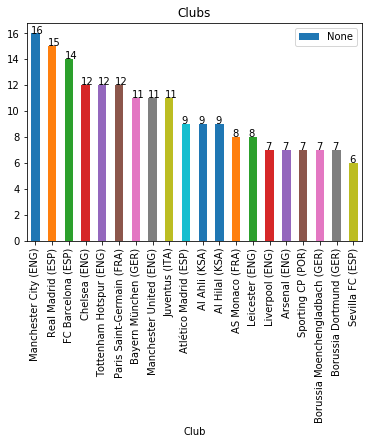

In [6]:
ax = data.groupby(['Club']).size().sort_values(ascending=False)[:20].plot.bar(title = u'Clubs', legend=True)

for p in ax.patches:
    # ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()))

In [142]:
data.groupby(['Club']).size().sort_values(ascending=False)

Club
Manchester City (ENG)                  16
Real Madrid (ESP)                      15
FC Barcelona (ESP)                     14
Chelsea (ENG)                          12
Tottenham Hotspur (ENG)                12
Paris Saint-Germain (FRA)              12
Bayern München (GER)                   11
Manchester United (ENG)                11
Juventus (ITA)                         11
Atlético Madrid (ESP)                   9
Al Ahli (KSA)                           9
Al Hilal (KSA)                          9
AS Monaco (FRA)                         8
Leicester (ENG)                         8
Liverpool (ENG)                         7
Arsenal (ENG)                           7
Sporting CP (POR)                       7
Borussia Moenchengladbach (GER)         7
Borussia Dortmund (GER)                 7
Sevilla FC (ESP)                        6
SSC Napoli (ITA)                        6
Eintracht Frankfurt (GER)               6
Lokomotiv Moskva (RUS)                  6
CSKA Moskva (RUS)            

In [143]:
print data.keys()
print data.Country.unique()

Index([u'Numero', u'FIFADisplayName', u'Country', u'LastName', u'FirstName',
       u'ShirtName', u'DOB', u'POS', u'Club', u'Height', u'Caps', u'Goals'],
      dtype='object')
[u'Argentina' u'Australia' u'Belgium' u'Brazil' u'Colombia' u'Costa Rica'
 u'Croatia' u'Denmark' u'Egypt' u'England' u'France' u'Germany' u'Iceland'
 u'IR Iran' u'Japan' u'Korea Republic' u'Mexico' u'Morocco' u'Nigeria'
 u'Panama' u'Peru' u'Poland' u'Portugal' u'Russia' u'Saudi Arabia'
 u'Senegal' u'Serbia' u'Spain' u'Sweden' u'Switzerland' u'Tunisia'
 u'Uruguay']


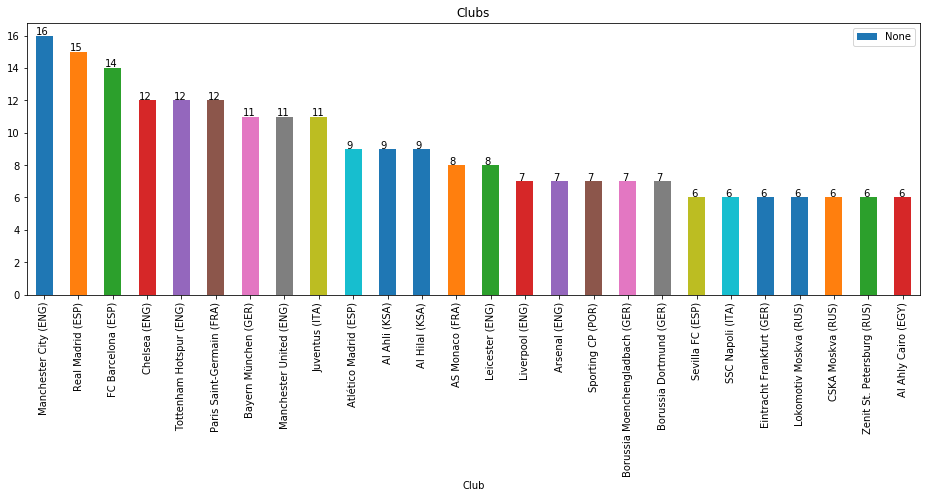

In [159]:
ax = data.groupby(['Club']).size()\
.sort_values(ascending=False)[:26]\
.plot.bar(title = u'Clubs', legend=True, figsize=(16,5))

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    # ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()))

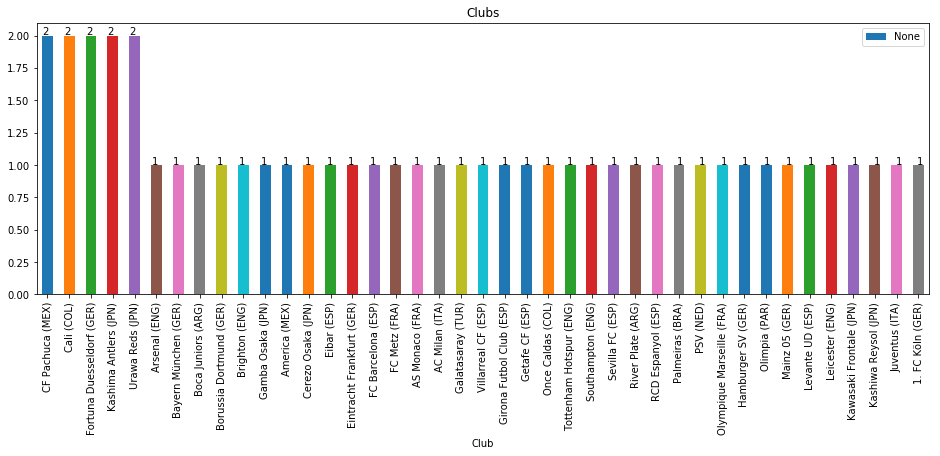

In [184]:
ax = data[(data['Country']=='Colombia') | (data['Country']=='Japan')].groupby(['Club']).size()\
.sort_values(ascending=False)[:46]\
.plot.bar(title = u'Clubs', legend=True, figsize=(16,5))

for p in ax.patches:
    # print p.get_x()
    # width, height = p.get_width(), p.get_height()
    # x, y = p.get_xy() 
    # print x, y
    # ax.annotate('{:.0f} %'.format(height), (p.get_x()+.15*width, p.get_y()+.4*height))

    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    # ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()))

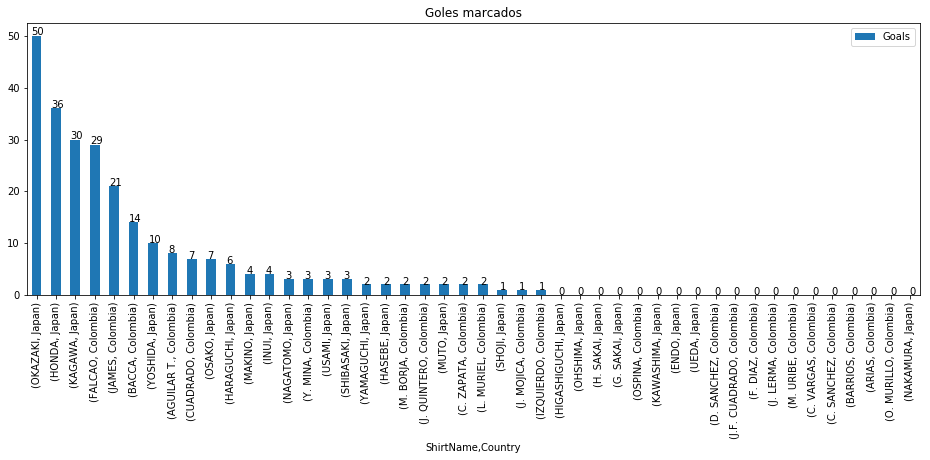

In [207]:
data.set_index([data.ShirtName, data.Country], drop=True,inplace=True)

ax = data[(data['Country']=='Japan') | (data['Country']=='Colombia')][['LastName', 'Goals']].sort_values(['Goals'], ascending=[False])\
.plot.bar(title = u'Goles marcados', legend=True, figsize=(16,5), stacked=True)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    

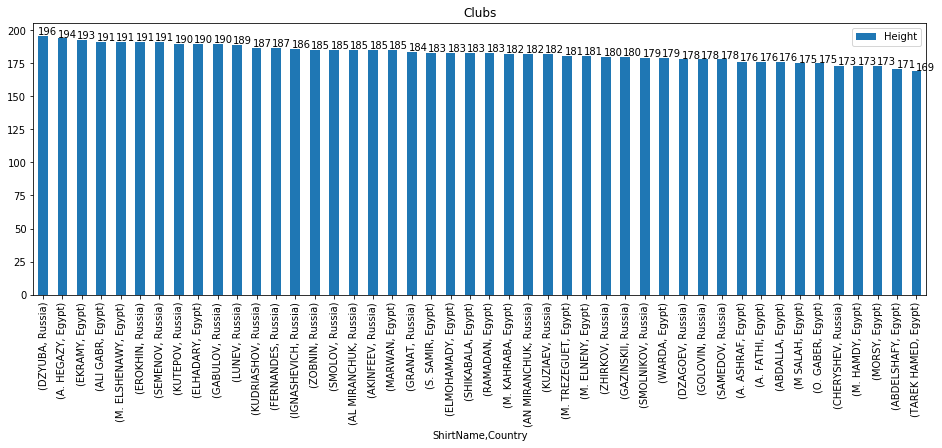

In [240]:
data.set_index([data.ShirtName, data.Country], drop=True,inplace=True)

ax = data[(data['Country']=='Russia') | (data['Country']=='Egypt')][['LastName', 'Height']].sort_values(['Height'], ascending=[False])\
.plot.bar(title = u'Clubs', legend=True, figsize=(16,5), stacked=True)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

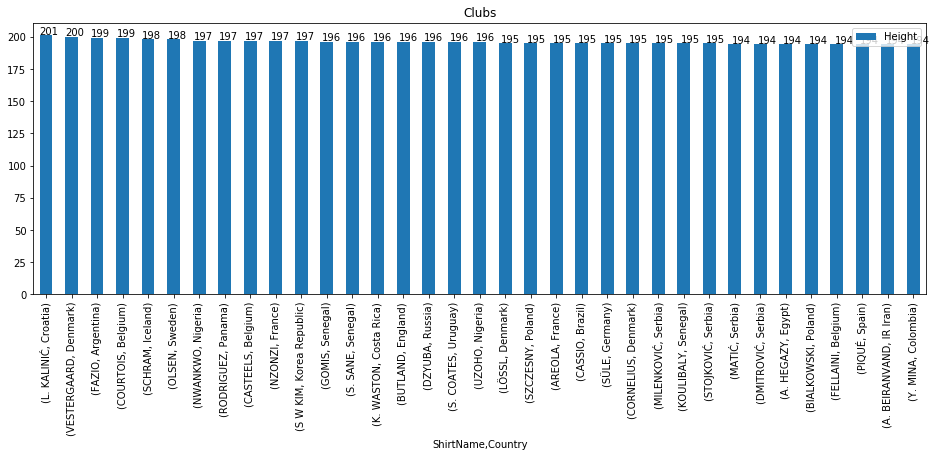

In [195]:
data.set_index([data.ShirtName, data.Country], drop=True,inplace=True)

ax = data[['LastName', 'Height']].sort_values(['Height'], ascending=[False])[0:35]\
.plot.bar(title = u'Clubs', legend=True, figsize=(16,5), stacked=True)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

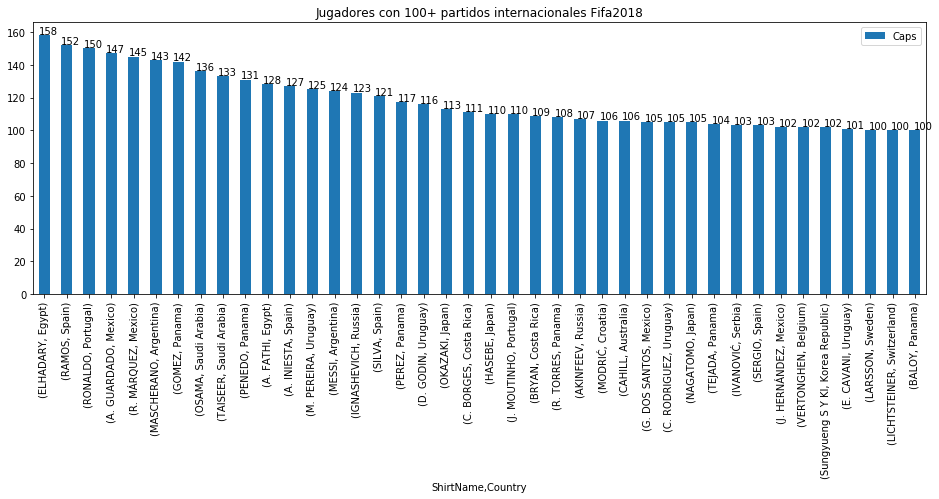

In [201]:
data.set_index([data.ShirtName, data.Country], drop=True,inplace=True)

ax = data[data['Caps']>=100][['LastName', 'Caps']].sort_values(['Caps'], ascending=[False])\
.plot.bar(title = u'Jugadores con 100+ partidos internacionales Fifa2018', legend=True, figsize=(16,5), stacked=True)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

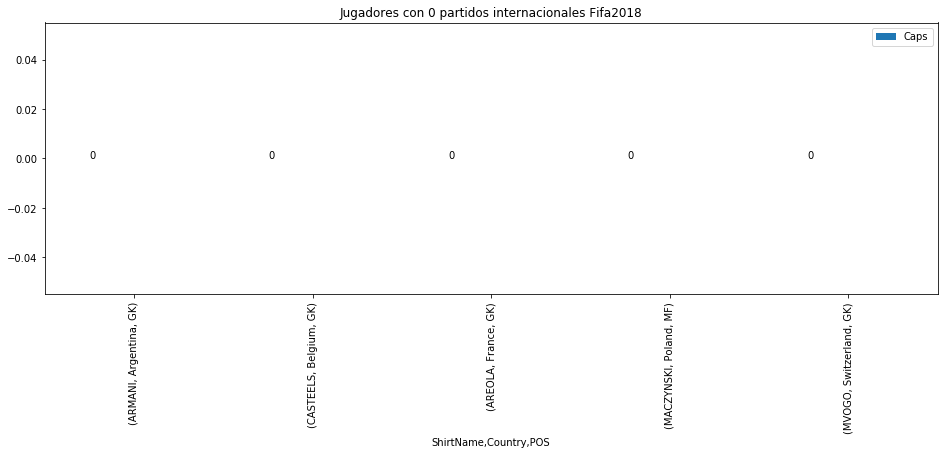

In [206]:
data.set_index([data.ShirtName, data.Country, data.POS], drop=True,inplace=True)

ax = data[data['Caps']==0][['LastName', 'Caps']].sort_values(['Caps'], ascending=[False])\
.plot.bar(title = u'Jugadores con 0 partidos internacionales Fifa2018', legend=True, figsize=(16,5), stacked=True)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))


In [58]:
print data_asambleistas

     Numero                               NOMBRES
0         1        AGUIÑAGA VALLEJO MARCELA PAOLA
1         2           ALARCON GUILLIN FREDY OSCAR
2         3   ALBORNOZ VINTIMILLA CLAUDIO ESTEBAN
3         4        ALEMAN MARMOL MONICA DEL ROCIO
4         5            ANDRADE MUÑOZ WILMA PIEDAD
5         6    ARIAS FERNANDEZ VERONICA ELIZABETH
6         7           ARIAS RAMIREZ ALBERTO JESUS
7         8          ARREGUI RUEDA MARCIA CECILIA
8         9          ARTEAGA MUÑOZ KARINA CECILIA
9        10           ASAN WONSANG JOSE FRANCISCO
10       11          AUQUILLA ORTEGA RAUL VICENTE
11       12            AZUERO RODAS ELISEO ALEXIS
12       13       BENAVIDES ZAMBRANO ZOILA TERESA
13       14          BERGMANN REYNA CARLO ALBERTO
14       15         BERNAL BERNAL ESTEBAN REMIGIO
15       16      BONILLA SALCEDO VIVIANA PATRICIA
16       17        BUENDIA HERDOIZA MARIA SOLEDAD
17       18     BURBANO MONTENEGRO FELIX FERNANDO
18       19   BUSTAMANTE MONTEROS RUBEN ALEJANDRO


In [238]:
data2 = data[(data['Country']=='France') | (data['Country']=='Nigeria') | (data['Country']=='Uruguay')]\
[['ShirtName', 'Height', 'Country', 'Goals']]


In [239]:
data2.to_dict(orient='records')

[{u'Country': u'France', u'Goals': 0, u'Height': 188, u'ShirtName': u'LLORIS'},
 {u'Country': u'France', u'Goals': 0, u'Height': 186, u'ShirtName': u'PAVARD'},
 {u'Country': u'France',
  u'Goals': 0,
  u'Height': 182,
  u'ShirtName': u'KIMPEMBE'},
 {u'Country': u'France', u'Goals': 2, u'Height': 191, u'ShirtName': u'VARANE'},
 {u'Country': u'France', u'Goals': 2, u'Height': 183, u'ShirtName': u'UMTITI'},
 {u'Country': u'France', u'Goals': 9, u'Height': 191, u'ShirtName': u'POGBA'},
 {u'Country': u'France',
  u'Goals': 20,
  u'Height': 174,
  u'ShirtName': u'GRIEZMANN'},
 {u'Country': u'France', u'Goals': 3, u'Height': 172, u'ShirtName': u'LEMAR'},
 {u'Country': u'France',
  u'Goals': 31,
  u'Height': 193,
  u'ShirtName': u'GIROUD'},
 {u'Country': u'France', u'Goals': 4, u'Height': 178, u'ShirtName': u'MBAPPE'},
 {u'Country': u'France',
  u'Goals': 2,
  u'Height': 178,
  u'ShirtName': u'DEMBELE'},
 {u'Country': u'France',
  u'Goals': 0,
  u'Height': 180,
  u'ShirtName': u'TOLISSO'},
 {u